# Showcase of the ImageDetails class

Finds colors, shapes and number of figures in a given image of size 600x600 or 256x256 with 70-75% accuracy.

In [ ]:
from ImageDetails import ImageDetails

import torch
from  torchvision.datasets import ImageFolder 
import torchvision.transforms as transforms
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

/shared-libs/python3.7/py/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
cpu


In [ ]:
folder = 'newly_generated_data/shapeonshapes_1k'

transform = transforms.Compose([
      transforms.ToTensor()\
    ,transforms.Resize([256, 256])
    ])
dataset = ImageFolder(folder, transform = transform)

loader = torch.utils.data.DataLoader(dataset, batch_size=16)
imgs,labels = next(iter(loader))

## Pretty plots

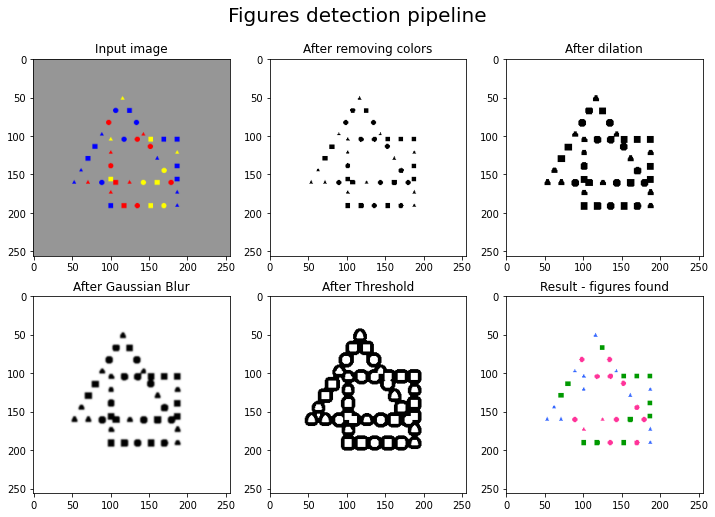

In [ ]:
# (note that detection has around 0.75 accuracy only)
ImageDetails(imgs[0]).analyze(plot=True,show_output=False)

## Per pixel analysis

In [ ]:
Details = ImageDetails()
Details.analyze(image=imgs[0],show_output=False)

pixel_details_1 = Details.pixel_analysis(x=160,y=160)
print(pixel_details_1)

pixel_details_2 = Details.pixel_analysis(x=160,y=190)
print(pixel_details_2)

{'color_names': 'yellow', 'shape_names': 'square', 'figure_ids': 4.0}
{'color_names': 'gray', 'shape_names': 'empty', 'figure_ids': -1.0}


## Figure counts

In [ ]:
Details = ImageDetails()
Details.analyze(image=imgs[0],show_output=False)

counts = Details.small_figure_shapes_counts
print(f"Small figure counts: {counts}")

Small figure counts: {'circles': 13, 'triangles': 14, 'squares': 12}


## Getting specific matrix

#### figure ID

In [ ]:
Details = ImageDetails()
Details.analyze(image=imgs[0],show_output=False)

Details.get_small_figure_ids() # matrix of ids, might be useful as a mask for SHAP etc

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

#### Shape names

In [ ]:
Details = ImageDetails()
Details.analyze(image=imgs[0],show_output=False)

Details.get_shapes_matrix()

array([['empty', 'empty', 'empty', ..., 'empty', 'empty', 'empty'],
       ['empty', 'empty', 'empty', ..., 'empty', 'empty', 'empty'],
       ['empty', 'empty', 'empty', ..., 'empty', 'empty', 'empty'],
       ...,
       ['empty', 'empty', 'empty', ..., 'empty', 'empty', 'empty'],
       ['empty', 'empty', 'empty', ..., 'empty', 'empty', 'empty'],
       ['empty', 'empty', 'empty', ..., 'empty', 'empty', 'empty']],
      dtype='<U8')

#### Color ids

[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]


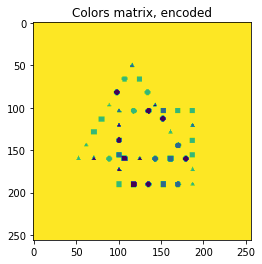

In [ ]:
Details = ImageDetails()
Details.analyze(image=imgs[0],show_output=False)

print(Details.get_colors_matrix()) # color codes, 4 colors available

plt.imshow(Details.get_colors_matrix())
plt.title("Colors matrix, encoded");

## Get full matrices

In [ ]:
Details = ImageDetails()
results = Details.analyze(image=imgs[0],show_output=True)

print(f"results type: {type(results)}")
print(f"keys: {results.keys()}")

results

results type: <class 'dict'>
keys: dict_keys(['color_names', 'shape_names', 'figure_ids'])


{'color_names': array([['gray', 'gray', 'gray', ..., 'gray', 'gray', 'gray'],
        ['gray', 'gray', 'gray', ..., 'gray', 'gray', 'gray'],
        ['gray', 'gray', 'gray', ..., 'gray', 'gray', 'gray'],
        ...,
        ['gray', 'gray', 'gray', ..., 'gray', 'gray', 'gray'],
        ['gray', 'gray', 'gray', ..., 'gray', 'gray', 'gray'],
        ['gray', 'gray', 'gray', ..., 'gray', 'gray', 'gray']], dtype='<U7'),
 'shape_names': array([['empty', 'empty', 'empty', ..., 'empty', 'empty', 'empty'],
        ['empty', 'empty', 'empty', ..., 'empty', 'empty', 'empty'],
        ['empty', 'empty', 'empty', ..., 'empty', 'empty', 'empty'],
        ...,
        ['empty', 'empty', 'empty', ..., 'empty', 'empty', 'empty'],
        ['empty', 'empty', 'empty', ..., 'empty', 'empty', 'empty'],
        ['empty', 'empty', 'empty', ..., 'empty', 'empty', 'empty']],
       dtype='<U8'),
 'figure_ids': array([[-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1

# Accuracy tests description

Best parameters were selected using grid search.

## Dataset

First, for each shape (triangle, circle, square) 3 images from each class (true, false, counterfactual) were generated. Each of these pictures have exactly 2 big figures build from 24 small figures each making it 48 small figures total per image. For each shape, all images contain small figures from the same shape. 

As a result, for each shape there are 9 images and each of them contains 48 small figures of this shape. Thefore, the whole dataset for parameters selection consists of 27 images with a total of 1296 small figures, 432 of each shape.

In [ ]:
import torch
from  torchvision.datasets import ImageFolder 
import torchvision.transforms as transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

batch_size = 16

folder_triangles = 'newly_generated_data/one_shape_only_48/triangles'
folder_squares = 'newly_generated_data/one_shape_only_48/squares'
folder_circles = 'newly_generated_data/one_shape_only_48/circles'

transform = transforms.Compose([
      transforms.ToTensor()\
    #   ,transforms.Resize([256, 256]) # used only for resized images
    ])

dataset_triangles_big = ImageFolder(folder_triangles, transform = transform)
dataset_squares_big = ImageFolder(folder_squares, transform = transform)
dataset_circles_big = ImageFolder(folder_circles, transform = transform)

loader_triangles_big = torch.utils.data.DataLoader(dataset_triangles_big, batch_size=batch_size)
loader_squares_big = torch.utils.data.DataLoader(dataset_squares_big, batch_size=batch_size)
loader_circles_big = torch.utils.data.DataLoader(dataset_circles_big, batch_size=batch_size)

cpu




## Metric

Each given set of parameters was given a score. The method of calculating it is as follows. 

First, take a picture from the first dataloader (for example a dataloder with pictures that have squares only). Then detect the shapes and count them. The perfect seach would return zeros for 2 of the shape types and 48 for the third one (in example a vector (48,0,0) meaning 48 squares and no figures of other classes).

Then, as the correct number of figures detected from each class is known, substract the answer vector from the counted figures vector (for example (a,b,c) - (48,0,0) where a, b and c are numbers of figures of each shape found in this image). Next, take the absolute value of the result.

Finally, sum all such differences vectors from all pictures (changing the goal from (48,0,0) to (0,48,0) and (0,0,48) for other shapes respectively), then sum the total numbers of mislabeled shapes to get a single number and divide it by the total number of figures in all of the images, 1296 (3 shapes times 3 classes times 48 small figues per image). To get the accuracy, substract the result from 1.

This is not a real accuracy score, since it can be negative if more than a total number of figure shapes were mislabeled.

## Search

The fuction below has been used for searching for the best set of parameters and saving them to the respective locations.




In [ ]:
import csv
import itertools
import tqdm
import random
import copy
import numpy as np
from ImageDetails import ImageDetails

def search_params_big(param_lists, answers, loaders):
    colnames = 'triangle,square,dp,minDist,param1,param2,maxRadius,minRadius,bad_circle,bad_square,bad_triangle,accuracy'

    with open("shapes_search_results/big_results_0_9.txt", "a") as myfile:
        myfile.write(colnames + "\n")
    with open("shapes_search_results/big_results_0_99.txt", "a") as myfile:
        myfile.write(colnames + "\n")
    with open("shapes_search_results/big_current_best.txt", "a") as myfile:
        myfile.write("iteration," + colnames + "\n")


    all_combinations = list(itertools.product(*param_lists))
    random.shuffle(all_combinations)
    iteration = 0
    best_accuracy = 0

    for params_current in tqdm.tqdm(all_combinations):
        iteration += 1
        triangle,square,dp,minDist,param1,param2,maxRadius,minRadius = params_current
        lmaxRadius = max(maxRadius,minRadius)

        params_dict = { 
                    "square":[square],
                    "triangle":[*triangle],
                    "circle":{"dp":dp, "minDist":minDist,"param1":param1, "param2":param2, 
                            "maxRadius":maxRadius,"minRadius":minRadius}
                }
        scores = []
        counter = 0
        for loader, answer in zip(loaders, answers):
            wrongs = 0
            for data, labels in loader:
                for img in data:
                    counter += 1
                    Details = ImageDetails()
                    # Details.small_shapes_thresholds = params_dict
                    Details.analyze(img,show_output=False, plot=False)
                    counts_dict = Details.small_figure_shapes_counts
                    wrongs += np.sum(np.abs(np.array(list(counts_dict.values())) - answer)) # measure: sum of sums of missclassified figures
            scores += [wrongs]
        accuracy = 1 - (np.sum(np.array(scores)) / (counter * 48))
        if accuracy >= 0.9:
            # save good results
            with open("shapes_search_results/big_results_0_9.txt", "a") as myfile:
                writer = csv.writer(myfile)
                writer.writerow([*params_current] + scores+[round(accuracy,4)])
        if accuracy >= 0.99:
            # save best results
            with open("shapes_search_results/big_results_0_99.txt", "a") as myfile:
                writer = csv.writer(myfile)
                writer.writerow([*params_current] + scores+[round(accuracy,4)])
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            # save best results
            with open("shapes_search_results/big_current_best.txt", "a") as myfile:
                writer = csv.writer(myfile)
                writer.writerow([iteration]+[*params_current] + scores+[round(accuracy,4)])
    print(f"\nBest Accuracy: {round(best_accuracy,4)}")
    


Finally, parameters to be tested were limited manually in the form of lists below. Code presented below has been executed in a separate notebook and the results of seach are not presented here. Only the score of the best parameters is printed.

In [ ]:
loaders = [loader_circles_big, loader_triangles_big, loader_squares_big]
answers = [np.array([48,0,0]),np.array([0,48,0]),np.array([0,0,48])]

ltriangle = [[round(i/100,4)] for i in range(15,23)] 
lsquare = [round(i/1000,4) for i in range(20,60)]
ldp = [round(i/10,4) for i in range(12,19)]
lminDist = [8] # some parameters could be constant
lparam1 = [100] # some parameters didn't change much and were left as such
lparam2 = [i for i in range(10,26,2)]
lmaxRadius = [20] #[i for i in range(5,13)]
lminRadius = [1] #[i for i in range(4,7)] 

param_lists = [ltriangle,lsquare,ldp,lminDist,lparam1,lparam2,lmaxRadius,lminRadius]
search_params_big(param_lists, answers, loaders)

To facilitate the search, at first, best parameters were searched for triangles, then for squares and then for circles. It was sufficient to change the correct answers vectors and change respective parameters in sucha way that no figure would be marked as being this shape.

## Final accuracy for both image resolutions

Accuracy of the model on original 600x600 images.

In [ ]:
loaders = [loader_circles_big, loader_triangles_big, loader_squares_big]

scores = []
counter = 0
for loader, answer in zip(loaders, answers):
    wrongs = 0
    for data, labels in loader:
        for img in data:
            counter += 1
            Details = ImageDetails()
            Details.analyze(img,show_output=False, plot=False)
            counts_dict = Details.small_figure_shapes_counts
            wrongs += np.sum(np.abs(np.array(list(counts_dict.values())) - answer)) # measure: sum of sums of missclassified figures
    scores += [wrongs]
accuracy = 1 - (np.sum(np.array(scores)) / (counter * 48))

print(f"\nBest Accuracy: {round(accuracy,4)} //on 600x600 images")


Best Accuracy: 0.7191 //on 600x600 images


Accuracy of the model on images resized to 256x256.

In [ ]:
loaders = [loader_circles_big, loader_triangles_big, loader_squares_big]

scores = []
counter = 0
for loader, answer in zip(loaders, answers):
    wrongs = 0
    for data, labels in loader:
        for img in data:
            counter += 1
            Details = ImageDetails()
            Details.analyze(img,show_output=False, plot=False)
            counts_dict = Details.small_figure_shapes_counts
            wrongs += np.sum(np.abs(np.array(list(counts_dict.values())) - answer)) # measure: sum of sums of missclassified figures
    scores += [wrongs]
accuracy = 1 - (np.sum(np.array(scores)) / (counter * 48))

print(f"\nBest Accuracy: {round(accuracy,4)} //on 256x256 images")


Best Accuracy: 0.7878 //on 256x256 images


## Summary and suggestions for the future

Overall, suprisingly figures on the resized images are easier to detect. 

A different idea for searching figures would be to cut rectangles containing found contours, resizing them to a unified shape and using either ML model or a set of simple rules (such as "the pixel near top left corner is gray so this figure is a circle" etc).

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bc6ece19-7b0a-4a42-9a06-463a643dea3a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>